Data Analytics II - Assignment 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/sample data/Social_Network_Ads.csv")

**Load Data**

In [ ]:
df.shape

(400, 5)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.drop(['User ID'],axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [ ]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


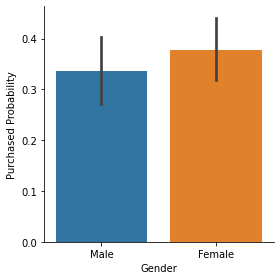

In [ ]:
g = sns.catplot(x = "Gender", y = "Purchased", data=df, kind="bar", height=4)
g.set_ylabels("Purchased Probability")
plt.show()

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


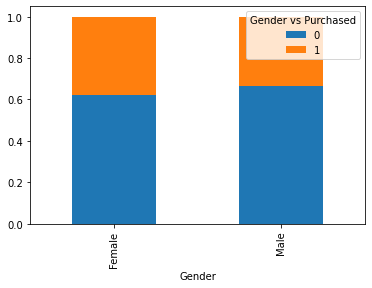

In [ ]:
M2 = pd.crosstab(df.Gender, df.Purchased, normalize="index")
print(M2)
M2.plot.bar(figsize=(6,4), stacked=True)
plt.legend(title="Gender vs Purchased", loc="upper right")
plt.show()

(5, 5)


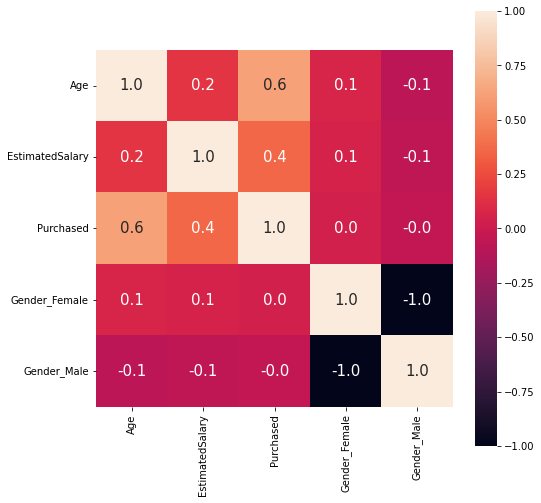

In [ ]:
#df = pd.get_dummies(df, columns=['Gender'])
corr = df.corr()
print(corr.shape) 
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':15})
plt.show()

In [ ]:
X = df.drop(['Purchased'], axis=1)
Y = df['Purchased']
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training Testing Split Successful")

Training Testing Split Successful


In [ ]:
from sklearn.linear_model import LogisticRegression
basemodel = LogisticRegression()
basemodel.fit(X_train, y_train)

print("Training Accuracy: ", basemodel.score(X_train, y_train) * 100)

Training Accuracy:  64.0625


In [ ]:
y_predict = basemodel.predict(X_test)
print("Testing Accuracy: ", basemodel.score(X_test, y_test) * 100)

Testing Accuracy:  65.0


**Noramlize The Data using MinMax Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X=df[['Age', 'EstimatedSalary']]
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
print("Training And Testing Split Was Successful")

Training And Testing Split Was Successful


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Training Accuracy: ",model.score(X_train, y_train) * 100)
print("Testing Accuracy: ", model.score(X_test, y_test) * 100)

Training Accuracy:  80.9375
Testing Accuracy:  87.5


**Measure The Performance Of The Model**

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predict)
print(acc)

0.875


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[51  1]
 [ 9 19]]


In [ ]:
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

TN:  51
TP:  19
FP:  1
FN:  9


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
prf = precision_recall_fscore_support(y_test, y_predict)
print("Precision: ",prf[0])
print("Recall: ",prf[1])
print("FScore: ",prf[2])
print("Support: ",prf[3])


Precision:  [0.85 0.95]
Recall:  [0.98076923 0.67857143]
FScore:  [0.91071429 0.79166667]
Support:  [52 28]


In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80

